In this notebook we will explore the airbnb seattle data and try to answer the following questions
1-when is the busiest time of the year?
2-how much could you make renting your property?
But first lets import the libraries we will use and explore our datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df_cal = pd.read_csv('./calendar.csv')
df_listing = pd.read_csv('./listings.csv')
df_review = pd.read_csv('./reviews.csv')

df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [2]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


Looking at our first question: I'll use the two datasets (listings and calender).
First I'll get the dates that the listings are not available in them and then group the data by month to show the busiest months

In [18]:
#Preparing the data
#Getting the busy times of the listings only
df_availability = df_cal.loc[df_cal['available'] == 'f']
df_availability

,listing_id,date,available,price
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [17]:
#making sure that our data contain no null values
no_nulls = set(df_availability.columns[df_availability.isnull().mean()==0])
no_nulls

{'available', 'date', 'listing_id'}

<ipython-input-20-35920dd5368e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_availability['date']= pd.to_datetime(df_availability['date'])


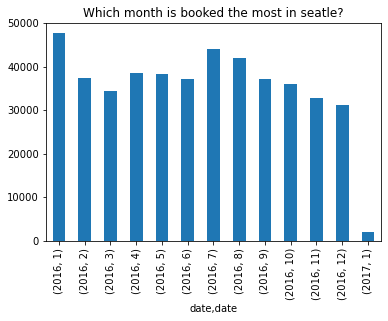

In [20]:
#changing the type of the date column to datetime, to be able to group yearly and monthly
df_availability['date']= pd.to_datetime(df_availability['date']) 

#Data Modelling

#getting the occupation monthly to know the busiest months
crowded_months= df_availability.groupby([df_availability['date'].dt.year,df_availability['date'].dt.month]).count()['available']

#Evaluation and Results
#The graph below answers the first question by showing that the busiest months are jan,july and augest
crowded_months.plot(kind="bar");
plt.title("Which month is booked the most in seatle?");

The second part of this notebook is dedicated to answer the second question, which is: how much could you make renting your property?
again we are using the same 2 datasets (calender and listings)


In [23]:
#Preparing the Data

#groupby listing_id, year and month to know the monthly occupation of each listing and resting index
temp_df = df_availability.groupby(['listing_id',pd.Grouper(key='date', freq='M')]).agg({'available': 'count'}).reset_index()
temp_df

,listing_id,date,available
0,3335,2016-01-31,28
1,3335,2016-02-29,28
2,5682,2016-01-31,18
3,5682,2016-02-29,6
4,5682,2016-03-31,20
...,...,...,...
20036,10339144,2016-10-31,31
20037,10339144,2016-11-30,30
20038,10339144,2016-12-31,31
20039,10339144,2017-01-31,2


In [24]:
#making sure there is no missing values in the data
no_nulls_temp_df = set(temp_df.columns[temp_df.isnull().mean()==0])
no_nulls_temp_df

{'available', 'date', 'listing_id'}

In [22]:
#renaming the key of the dataframe df_listing to merge in with temp_df to get some extra details from the listings data frame
df_listing.rename(columns = {'id': 'listing_id'}, inplace = True)
#new dataframe containg the needed columns
df_listingHost_detail = df_listing[['listing_id','price','neighbourhood_group_cleansed']]
df_busy = pd.merge(temp_df,df_listingHost_detail , on='listing_id')

In [25]:
#no missing values
no_nulls_df_busy = set(df_busy.columns[df_busy.isnull().mean()==0])
no_nulls_df_busy

{'available', 'date', 'listing_id', 'neighbourhood_group_cleansed', 'price'}

In [27]:
#there might be no missing values in the dataframe, but there is the column 'price' its datatype is an object (as the number contains $ sign) and we need to do some calculations, 
#so a function to change the datatype from object to float is created below

def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

#Changing the datatype of the price column
df_listing['price'] = df_listing['price'].apply(clean_currency).astype('float')
df_listing['price'].dtype

dtype('float64')

In [8]:
df_busy['price'] = df_busy['price'].apply(clean_currency).astype('float')

#adding a new column calculating the monthly revenue for each listing
df_busy['monthly_revenue']= df_busy.available*df_busy.price

#renaming the column name to a more meaningful name
df_busy.rename(columns = {'available': 'occupied_days'}, inplace = True)
#checking the data
df_busy

,listing_id,date,occupied_days,price,host_is_superhost,neighbourhood_group_cleansed,monthly_revenue
0,3335,2016-01-31,28,120.0,f,Rainier Valley,3360.0
1,3335,2016-02-29,28,120.0,f,Rainier Valley,3360.0
2,5682,2016-01-31,18,48.0,f,Delridge,864.0
3,5682,2016-02-29,6,48.0,f,Delridge,288.0
4,5682,2016-03-31,20,48.0,f,Delridge,960.0
...,...,...,...,...,...,...,...
20036,10339144,2016-10-31,31,60.0,f,Capitol Hill,1860.0
20037,10339144,2016-11-30,30,60.0,f,Capitol Hill,1800.0
20038,10339144,2016-12-31,31,60.0,f,Capitol Hill,1860.0
20039,10339144,2017-01-31,2,60.0,f,Capitol Hill,120.0


In [9]:
#Data Modeling
#average monthly occupation days in seattle
monthly_mean_occupation = df_busy.occupied_days.mean()
monthly_mean_occupation

22.904445885933836

In [10]:
#average monthly revenue
monthly_revenue= df_busy.monthly_revenue.mean()
monthly_revenue

2965.1078289506513

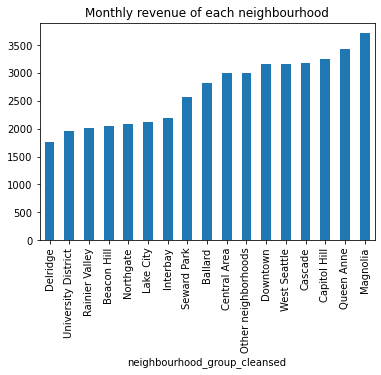

In [11]:
#average neigbourhood monthly revenue
monthly_neigbhourhood_revenue= df_busy.groupby(['neighbourhood_group_cleansed']).mean()['monthly_revenue'].sort_values()
monthly_neigbhourhood_revenue.plot(kind="bar");
plt.title("Monthly revenue of each neighbourhood");

So for the Second question, the observations have shown that if you have your property in one of the visitors favourite spots and you choose to rent it during the busiest months, you'll be able to rent your property around 22 days a month and that will guarantee you $2965/month